## Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist=fetch_openml('mnist_784')

In [3]:
x,y=mnist["data"],mnist["target"]

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
%matplotlib inline

In [7]:
import matplotlib
import matplotlib.pyplot as plt

In [8]:
some_digit=x[37000]
some_digit_image=some_digit.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

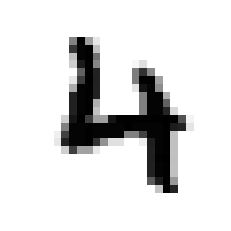

In [9]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [10]:
y[37000]

'4'

In [11]:
x_train=x[:60000]
x_test=x[60000:]

In [12]:
y_train=y[:60000]
y_test=y[60000:]

In [13]:
import numpy as np
shuffle_index=np.random.permutation(60000)
x_train, y_train=x_train[shuffle_index],y_train[shuffle_index]

## Creating a 2 detector

In [14]:
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)
y_train_4=(y_train==2)
y_test_4=(y_test==2)

In [15]:
y_train

array([8, 6, 3, ..., 0, 7, 3], dtype=int8)

Logistic Regression

In [16]:
#from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred=lr_model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, mean_squared_error
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score:", lr_model.score(x_train, y_train)*100)
#Printing the accuracy of the model
print("The accuracy of the Logistic Regression Model is: ", accuracy_score(y_test, y_pred)*100 , "%")
lr_model_results=accuracy_score(y_test, y_pred)*100

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000

[[ 963    0    0    3    1    3    4    4    2    0]
 [   0 1112    4    2    0    1    3    2   11    0]
 [   3   10  926   15    6    4   15    8   42    3]
 [   4    1   21  916    1   26    3    9   22    7]
 [   1    1    7    3  910   

### SVM

In [18]:
from sklearn.svm import SVC
svc=SVC()

svc.fit(x_train, y_train)

SVC()

In [19]:
y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",svc.score(x_train,y_train)*100)
#Printing the accuracy of the model
print("The accuracy of the Support Vector Machine Classification Model is: ", accuracy_score(y_test, y_pred)*100, "%")
svc_results=accuracy_score(y_test, y_pred)*100

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   6    1 1006    2    1    0    2    7    6    1]
 [   0    0    2  995    0    2    0    5    5    1]
 [   0    0    5    0  961   

## MLP

In [20]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)
mlp.fit(x_train,y_train)

Iteration 1, loss = 1.52158158
Iteration 2, loss = 1.31869875
Iteration 3, loss = 1.32786391
Iteration 4, loss = 1.25121150
Iteration 5, loss = 1.33574530
Iteration 6, loss = 1.49049960
Iteration 7, loss = 1.33713600
Iteration 8, loss = 1.19794590
Iteration 9, loss = 1.16263204
Iteration 10, loss = 1.10611642
Iteration 11, loss = 1.02391193
Iteration 12, loss = 1.00727301
Iteration 13, loss = 1.03584376
Iteration 14, loss = 1.02066612
Iteration 15, loss = 1.05130040
Iteration 16, loss = 1.21645109
Iteration 17, loss = 1.13416127
Iteration 18, loss = 0.99217034
Iteration 19, loss = 0.97278214
Iteration 20, loss = 1.07570097
Iteration 21, loss = 0.98174119
Iteration 22, loss = 0.92402198
Iteration 23, loss = 0.90467186
Iteration 24, loss = 1.00457513
Iteration 25, loss = 0.95177531
Iteration 26, loss = 0.89660170
Iteration 27, loss = 0.94901625
Iteration 28, loss = 0.97281436
Iteration 29, loss = 0.93076740
Iteration 30, loss = 0.92487954
Iteration 31, loss = 0.93006255
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(15,),
              learning_rate_init=0.1, random_state=1, solver='sgd',
              verbose=True)

In [29]:
y_pred=mlp.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, mean_squared_error
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Confusion_Matrices.append(confusion_matrix(y_test, mlp.predict(x_test)))
print("Training Score:", mlp.score(x_train, y_train)*100)
#Printing the accuracy of the model
print("The accuracy of the MLP is: ", accuracy_score(y_test, y_pred)*100 , "%")
mlp_results=accuracy_score(y_test, y_pred)*100


              precision    recall  f1-score   support

           0       0.86      0.95      0.90       980
           1       0.90      0.92      0.91      1135
           2       0.86      0.78      0.82      1032
           3       0.80      0.75      0.77      1010
           4       0.50      0.88      0.63       982
           5       0.76      0.55      0.64       892
           6       0.70      0.91      0.79       958
           7       0.78      0.86      0.82      1028
           8       0.64      0.59      0.61       974
           9       0.51      0.10      0.17      1009

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.71     10000
weighted avg       0.73      0.73      0.71     10000

[[ 929    0    2    2    1    9   33    2    2    0]
 [   1 1045    3    4    0    0    4    1   76    1]
 [  49    3  809   34   28    3   78   13   15    0]
 [  28   22   40  753   10   94    6   32   19    6]
 [   0    6    4    0  868   